In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('https://github.com/Pulkiiit/DataScience/raw/refs/heads/main/1688640705_hr_comma_sep.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


No null values

In [6]:
df.shape

(14999, 10)

In [7]:
df.drop_duplicates(inplace=True)
df.info()
df.head()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [8]:
df.shape

(11991, 10)

dropped around 3000 duplicates

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df['sales'].value_counts()

,count
sales,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


Encoding for converting categorical data to numerical data

In [11]:
df['salary'].value_counts()

,count
salary,
low,5740
medium,5261
high,990


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Use onehotencoder on sales
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).fit(df[['sales']])
df_ohe = ohe.transform(df[['sales']])
df_ohe_df = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out(), index=df.index)
df = pd.concat([df,df_ohe_df],axis=1).drop(columns=['sales'])

# Use label encoder on salary
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df['salary'].value_counts()

,count
salary,
1,5740
2,5261
0,990


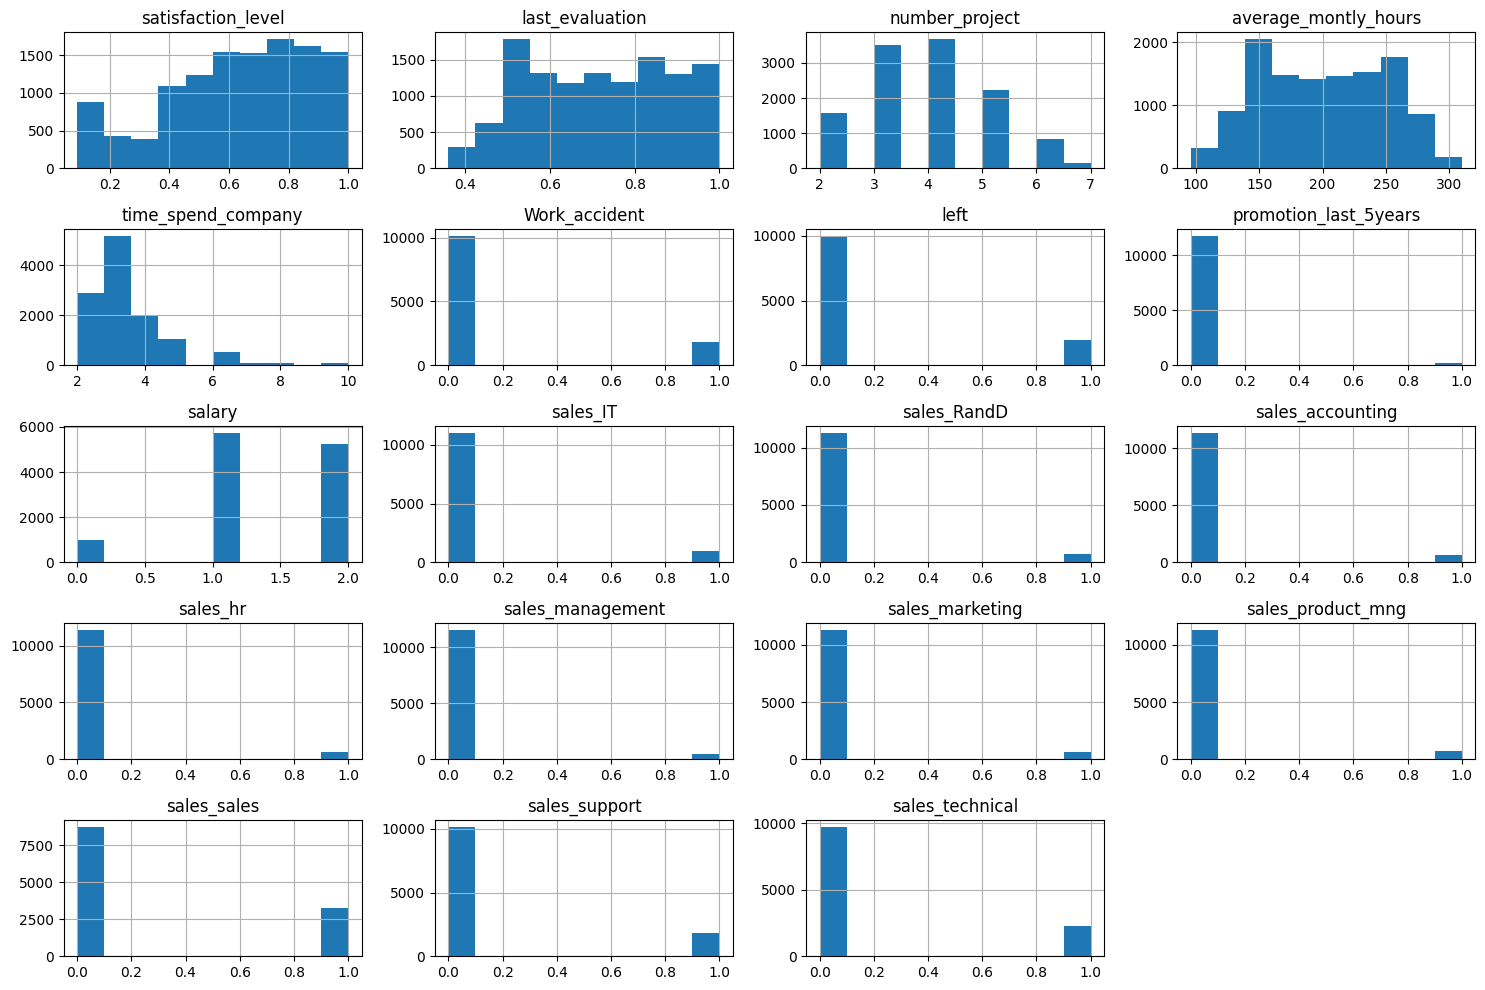

In [14]:
# prompt: plot histogram for all features

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Let's scheck for outliers

Outliers in 'time_spend_company':
       satisfaction_level  last_evaluation  number_project  \
1                0.780220         0.781250             0.6   
17               0.758242         0.984375             0.4   
34               0.824176         0.796875             0.4   
47               0.527473         0.531250             0.2   
67               0.890110         0.968750             0.4   
...                   ...              ...             ...   
11994            0.142857         0.906250             0.2   
11995            0.890110         0.296875             0.2   
11996            0.714286         0.921875             0.6   
11997            0.835165         0.281250             0.2   
11998            0.263736         0.453125             0.2   

       average_montly_hours  time_spend_company  Work_accident  left  \
1                  0.775701                 0.5              0     1   
17                 0.742991                 0.5              0     1   
34   

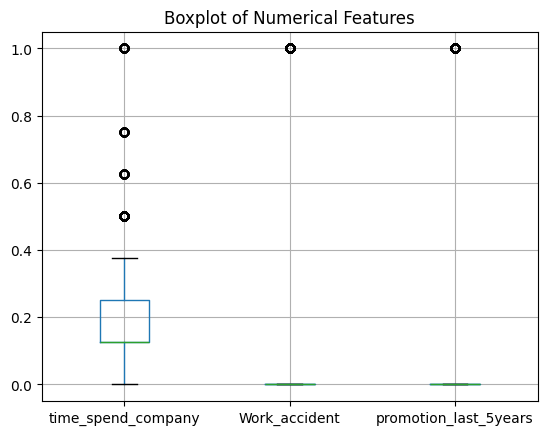

In [16]:
# Identify numerical columns
numerical_cols = ['time_spend_company', 'Work_accident', 'promotion_last_5years']

# Check for outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outliers in '{col}':")
    print(outliers)
    print("-" * 30)

# You can also visualize outliers using boxplots
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Features')
plt.show()

Looks like no outliers

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
import seaborn as sns

<Axes: xlabel='left', ylabel='satisfaction_level'>

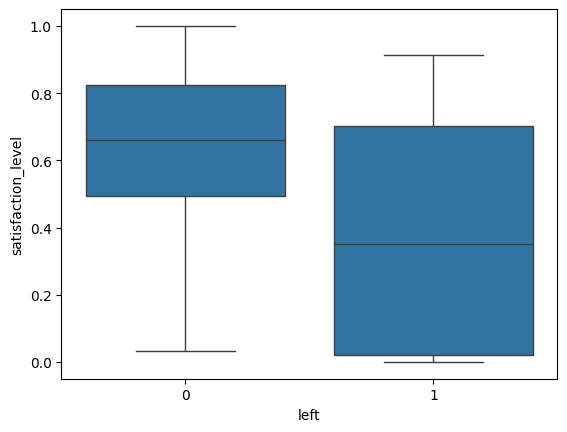

In [19]:
sns.boxplot(x='left', y='satisfaction_level', data=df)

So satisfction level does impact employee turnover as we can see the average satisfaction of employees who left is lower than who stayed

<Axes: xlabel='left', ylabel='last_evaluation'>

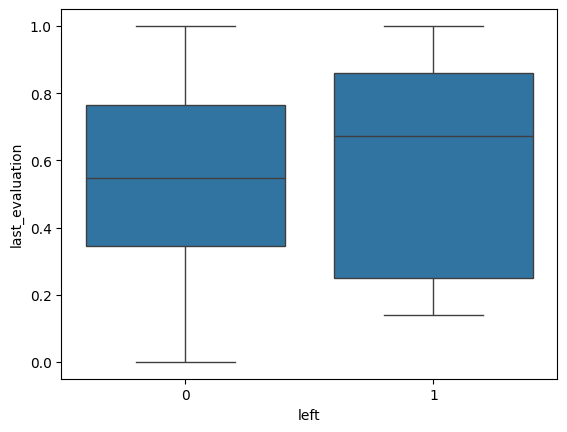

In [20]:
sns.boxplot(x='left', y='last_evaluation', data = df)

Evaluation seems to have no major impact on employee turnover

<Axes: xlabel='left', ylabel='number_project'>

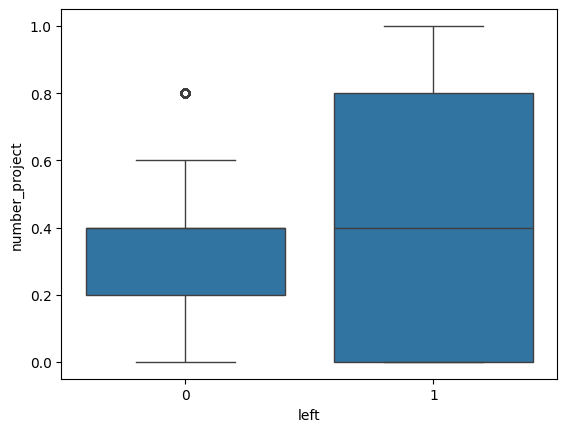

In [21]:
sns.boxplot(x='left', y='number_project', data=df)

Employees involved in several projects are more likely to leave

<Axes: xlabel='left', ylabel='average_montly_hours'>

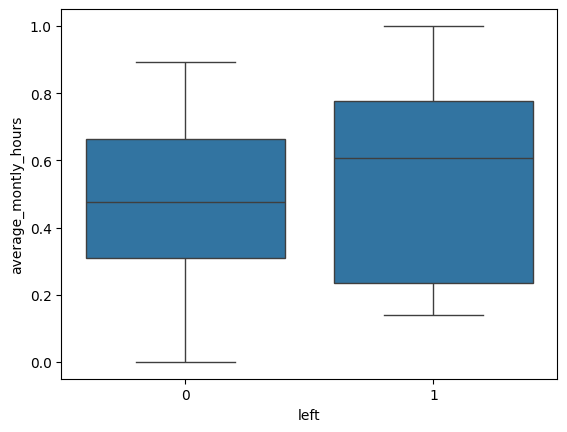

In [22]:
sns.boxplot(x='left', y='average_montly_hours', data=df)

working hourse for employees who left were greater but not by a large margin

<Axes: xlabel='left', ylabel='Work_accident'>

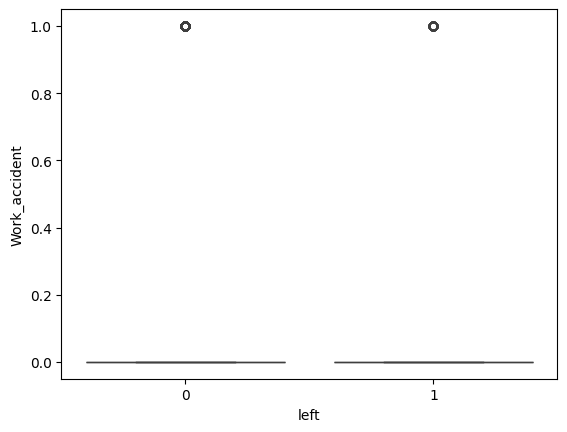

In [23]:
sns.boxplot(x='left', y='Work_accident', data=df)

In [24]:
df['Work_accident'].value_counts()

,count
Work_accident,
0,10141
1,1850


Work accident play no role

<Axes: xlabel='promotion_last_5years', ylabel='count'>

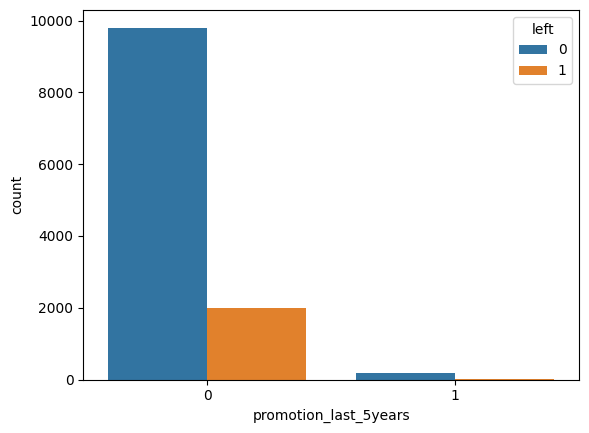

In [25]:
sns.countplot(x='promotion_last_5years',hue='left', data=df)

People whi left were generally who did not recieve any promotion in last 5 years

<Axes: xlabel='salary', ylabel='count'>

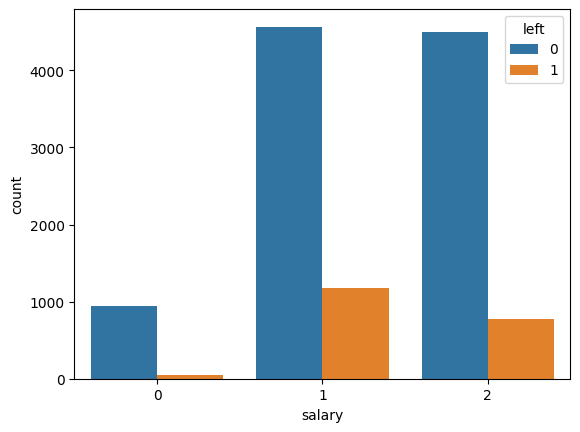

In [26]:
sns.countplot(x='salary', hue='left', data=df)

People with low and medium salary left while high not that much

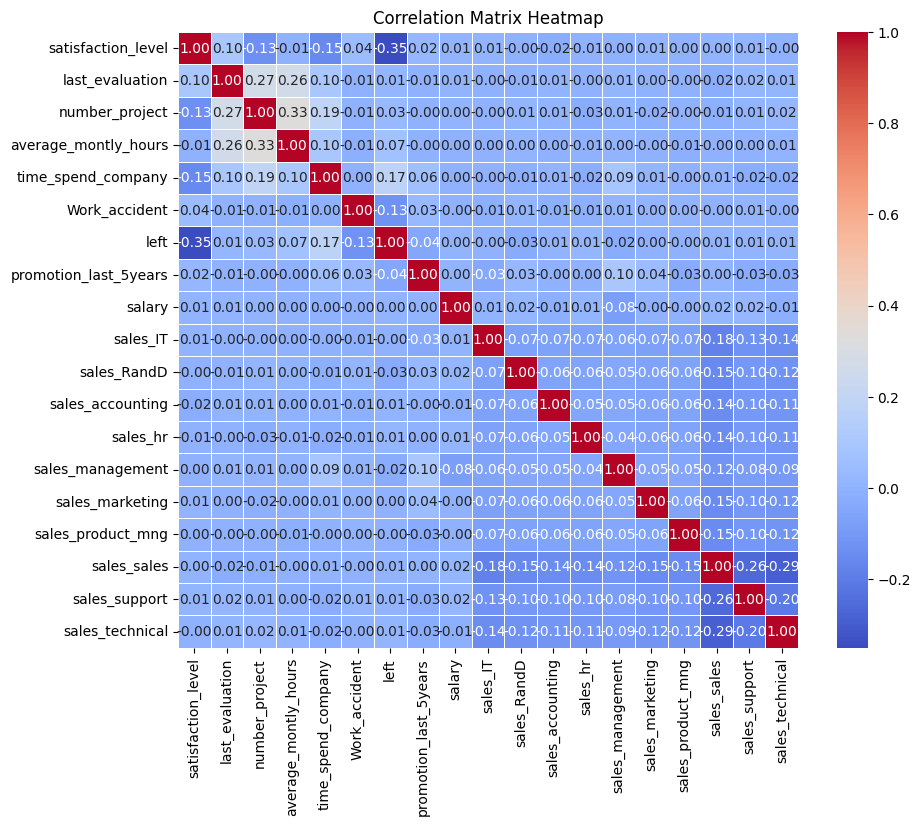

In [27]:
numerical_df = df.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
- 1.	Choose columns satisfaction_level, last_evaluation and left.

In [28]:
left_employees = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

In [29]:
left_employees.shape

(1991, 2)

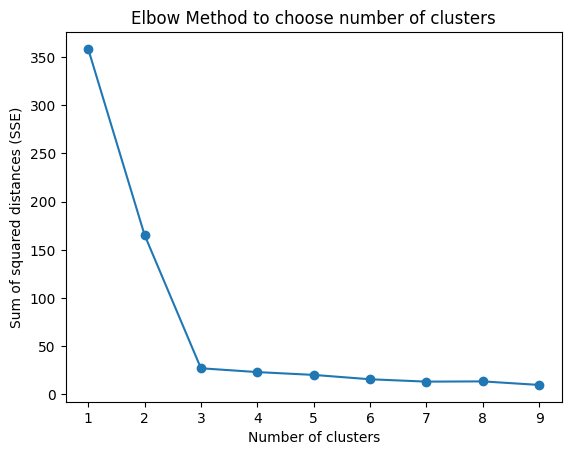

In [30]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(left_employees)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method to choose number of clusters')
plt.show()

3 seems to be the optimal value of k

In [31]:
k = 3  # change based on elbow method plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(left_employees)

# Add cluster labels to the data
left_employees['cluster'] = clusters

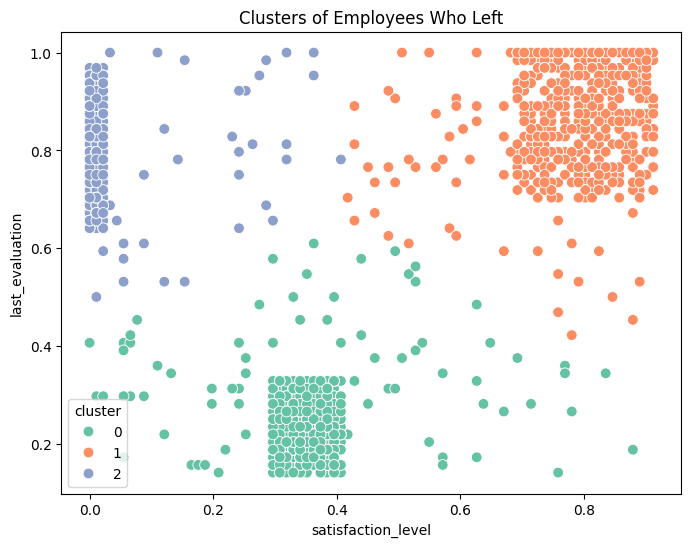

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=left_employees,
    x='satisfaction_level',
    y='last_evaluation',
    hue='cluster',
    palette='Set2',
    s=60
)
plt.title('Clusters of Employees Who Left')
plt.show()


Ok, so people with really low satisfaction level, really low last evaluation AND people with both high evaluation and satisfaction also left

4.	Handle the left Class Imbalance using SMOTE technique.

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['left'])
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123, stratify=y
)

In [34]:
y.value_counts()

,count
left,
0,10000
1,1991


Use SMOTE to add more values with left=1

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [36]:
y_train_smote.value_counts()

,count
left,
0,7999
1,7999


In [37]:
X_train.shape

(9592, 18)

5.	Perform 5-Fold cross-validation model training and evaluate performance.
5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.
5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.
5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.


In [38]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      7999
           1       0.78      0.85      0.81      7999

    accuracy                           0.81     15998
   macro avg       0.81      0.81      0.81     15998
weighted avg       0.81      0.81      0.81     15998



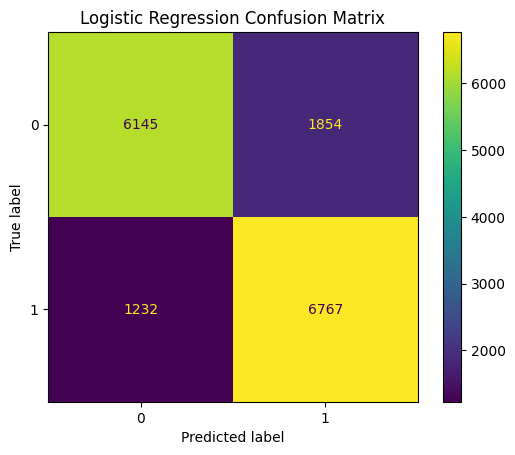

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=123)
y_pred_logreg = cross_val_predict(log_reg, X_train_smote, y_train_smote, cv=cv)

print("Logistic Regression - Classification Report")
print(classification_report(y_train_smote, y_pred_logreg))

ConfusionMatrixDisplay.from_predictions(y_train_smote, y_pred_logreg)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7999
           1       1.00      0.98      0.99      7999

    accuracy                           0.99     15998
   macro avg       0.99      0.99      0.99     15998
weighted avg       0.99      0.99      0.99     15998



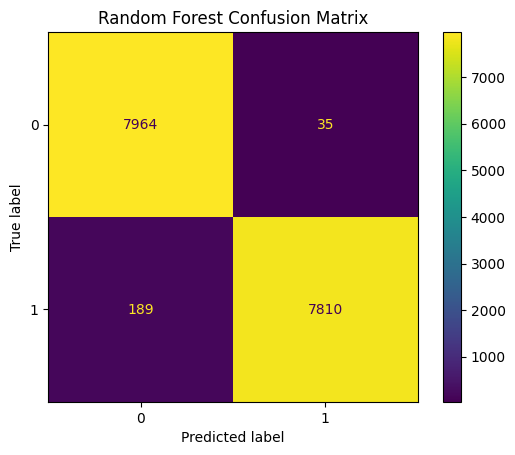

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=123)
y_pred_rf = cross_val_predict(rf_clf, X_train_smote, y_train_smote, cv=cv)

print("Random Forest - Classification Report")
print(classification_report(y_train_smote, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_train_smote, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()


Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7999
           1       0.98      0.97      0.97      7999

    accuracy                           0.97     15998
   macro avg       0.97      0.97      0.97     15998
weighted avg       0.97      0.97      0.97     15998



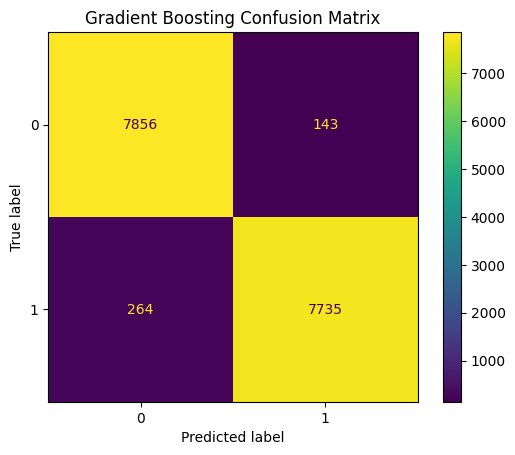

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=123)
y_pred_gb = cross_val_predict(gb_clf, X_train_smote, y_train_smote, cv=cv)

print("Gradient Boosting - Classification Report")
print(classification_report(y_train_smote, y_pred_gb))

ConfusionMatrixDisplay.from_predictions(y_train_smote, y_pred_gb)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


6.	Identify the best model and justify the evaluation metrics used.
6.1.	Find the ROC/AUC for each model and plot the ROC curve.
6.2.	Find the confusion matrix for each of the models.
6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?


In [42]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

def plot_roc(model, X, y, label, cv):
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")
    return roc_auc

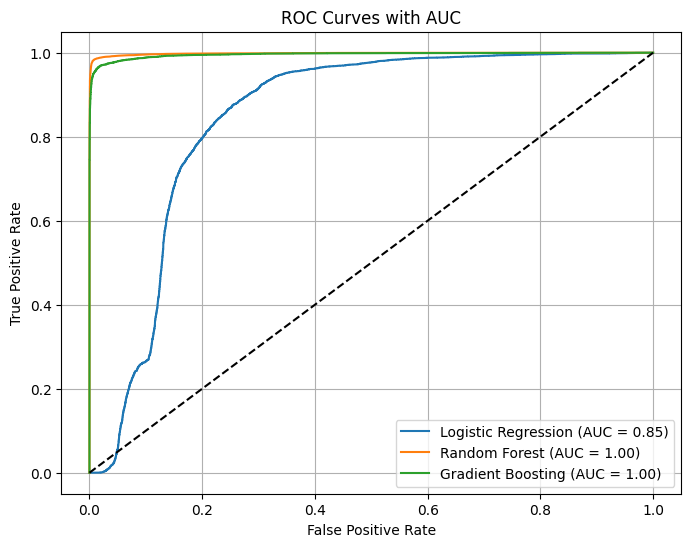

In [43]:
plt.figure(figsize=(8, 6))

auc_log = plot_roc(LogisticRegression(max_iter=1000, random_state=123), X_train_smote, y_train_smote, "Logistic Regression", cv)
auc_rf = plot_roc(RandomForestClassifier(random_state=123), X_train_smote, y_train_smote, "Random Forest", cv)
auc_gb = plot_roc(GradientBoostingClassifier(random_state=123), X_train_smote, y_train_smote, "Gradient Boosting", cv)

plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with AUC')
plt.legend()
plt.grid()
plt.show()


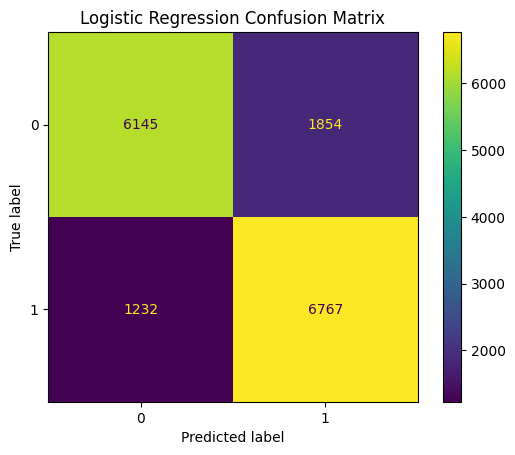

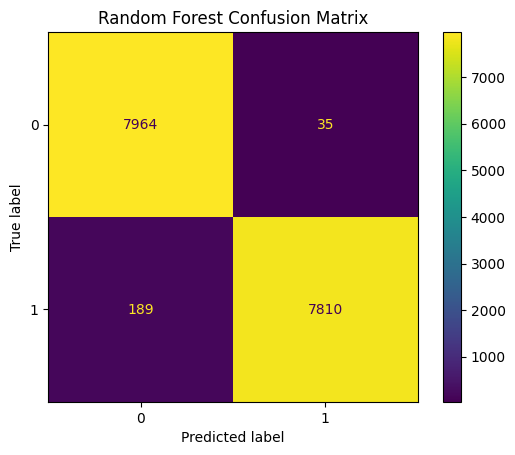

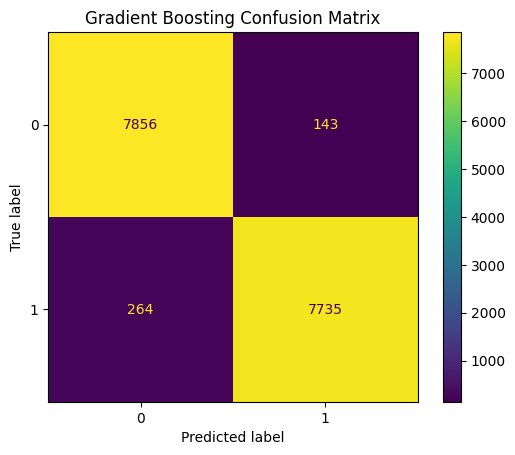

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=123)
log_preds = cross_val_predict(log_model, X_train_smote, y_train_smote, cv=cv)
ConfusionMatrixDisplay.from_predictions(y_train_smote, log_preds)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
rf_model = RandomForestClassifier(random_state=123)
rf_preds = cross_val_predict(rf_model, X_train_smote, y_train_smote, cv=cv)
ConfusionMatrixDisplay.from_predictions(y_train_smote, rf_preds)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=123)
gb_preds = cross_val_predict(gb_model, X_train_smote, y_train_smote, cv=cv)
ConfusionMatrixDisplay.from_predictions(y_train_smote, gb_preds)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


In [45]:
best_model = max(
    [("Logistic Regression", auc_log),
     ("Random Forest", auc_rf),
     ("Gradient Boosting", auc_gb)],
    key=lambda x: x[1]
)

print(f"Best model: {best_model[0]} with AUC: {best_model[1]:.2f}")


Best model: Random Forest with AUC: 1.00


In [46]:
best_model

('Random Forest', np.float64(0.9981976900756799))

In [47]:
# Refit the best model on full training data
best_model = GradientBoostingClassifier(random_state=123)
best_model.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set
test_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities of class '1' (left)


In [48]:
import pandas as pd

# Create a DataFrame to hold results
test_results = X_test.copy()
test_results['Actual Left'] = y_test
test_results['Turnover Probability'] = test_probs

# Categorize into zones
def categorize_risk(prob):
    if prob < 0.20:
        return "Safe Zone (Green)"
    elif prob < 0.60:
        return "Low Risk Zone (Yellow)"
    elif prob < 0.90:
        return "Medium Risk Zone (Orange)"
    else:
        return "High Risk Zone (Red)"

test_results['Risk Zone'] = test_results['Turnover Probability'].apply(categorize_risk)


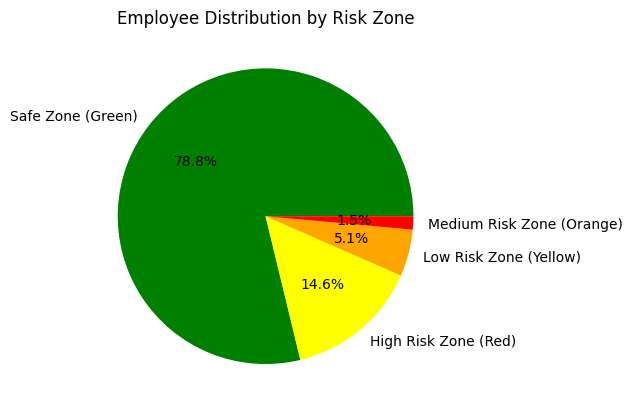

In [49]:
import matplotlib.pyplot as plt

zone_counts = test_results['Risk Zone'].value_counts()
zone_counts.plot.pie(autopct='%1.1f%%', colors=["green", "yellow", "orange", "red"])
plt.title("Employee Distribution by Risk Zone")
plt.ylabel("")
plt.show()